# **Data**

## **Dependent Variable**

In [ ]:
import pandas as pd

crime_path = "Data/MPS LSOA Level Crime (most recent 24 months).csv"
london_crime = pd.read_csv(crime_path)

print(london_crime.columns)

In [117]:
filtered_crime = london_crime[london_crime['Minor Category'] == 'ROBBERY OF PERSONAL PROPERTY']

london_robbery = filtered_crime.groupby('LSOA Code').sum(numeric_only=True).reset_index()

all_LSOA_codes = london_crime['LSOA Code'].unique()

london_robbery = london_robbery.set_index('LSOA Code').reindex(all_LSOA_codes, fill_value=0).reset_index()
london_robbery.iloc[:, 1:] = london_robbery.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
london_robbery['total_robberies'] = london_robbery.iloc[:, 1:].sum(axis=1)

london_robbery = london_robbery[['LSOA Code', 'total_robberies']]

print(london_robbery)

      LSOA Code  total_robberies
0     E01003479               20
1     E01002717                4
2     E01004649               16
3     E01003345                3
4     E01004001                1
...         ...              ...
4983  E01003533               14
4984  E01003755                6
4985  E01002770               57
4986  E01003882                6
4987  E01002219               24

[4988 rows x 2 columns]


## **Key Independent Variable (Cash Access)**

In [118]:
import geopandas as gpd
import matplotlib.pyplot as plt

lsoa_boundary_path = "Data/LSOA Boundaries/LSOA_2021_EW_BGC_V5.shp"
london_lsoa = gpd.read_file(lsoa_boundary_path)
london_lsoa = london_lsoa.to_crs(epsg=27700)

print(london_lsoa)

        LSOA21CD                   LSOA21NM           LSOA21NMW   BNG_E  \
0      E01000001        City of London 001A                None  532123   
1      E01000002        City of London 001B                None  532480   
2      E01000003        City of London 001C                None  532239   
3      E01000005        City of London 001E                None  533581   
4      E01000006  Barking and Dagenham 016A                None  544994   
...          ...                        ...                 ...     ...   
35667  W01002036     Vale of Glamorgan 005G  Bro Morgannwg 005G  317939   
35668  W01002037     Vale of Glamorgan 005H  Bro Morgannwg 005H  318527   
35669  W01002038     Vale of Glamorgan 014G  Bro Morgannwg 014G  306491   
35670  W01002039     Vale of Glamorgan 014H  Bro Morgannwg 014H  306564   
35671  W01002040     Vale of Glamorgan 015F  Bro Morgannwg 015F  311423   

        BNG_N                                      LAT  \
0      181632                            

In [119]:
london_robbery = pd.merge(
    london_robbery,         
    london_lsoa,        
    how='left',          
    left_on='LSOA Code',  
    right_on='LSOA21CD'    
)

print(london_robbery)

      LSOA Code  total_robberies   LSOA21CD                   LSOA21NM  \
0     E01003479               20  E01003479                Newham 035A   
1     E01002717                4  E01002717             Islington 016A   
2     E01004649               16  E01004649           Westminster 001B   
3     E01003345                3  E01003345              Lewisham 010E   
4     E01004001                1  E01004001             Southwark 026B   
...         ...              ...        ...                        ...   
4983  E01003533               14  E01003533                Newham 011A   
4984  E01003755                6  E01003755             Redbridge 023B   
4985  E01002770               57  E01002770             Islington 004B   
4986  E01003882                6  E01003882  Richmond upon Thames 014A   
4987  E01002219               24  E01002219                Harrow 030B   

     LSOA21NMW   BNG_E   BNG_N                                      LAT  \
0         None  542478  181238      

In [120]:
london_robbery = london_robbery[['LSOA21CD', 'LSOA21NM', 'total_robberies', 'geometry']]
print(london_robbery)

       LSOA21CD                   LSOA21NM  total_robberies  \
0     E01003479                Newham 035A               20   
1     E01002717             Islington 016A                4   
2     E01004649           Westminster 001B               16   
3     E01003345              Lewisham 010E                3   
4     E01004001             Southwark 026B                1   
...         ...                        ...              ...   
4983  E01003533                Newham 011A               14   
4984  E01003755             Redbridge 023B                6   
4985  E01002770             Islington 004B               57   
4986  E01003882  Richmond upon Thames 014A                6   
4987  E01002219                Harrow 030B               24   

                                               geometry  
0     POLYGON ((542788.359 181260.24, 542857.557 181...  
1     POLYGON ((532592.419 184841.739, 532598.418 18...  
2     POLYGON ((526774.163 183660.411, 526863.009 18...  
3     POLYG

In [121]:
osm_pois_path_b = "Data/OSM/gis_osm_pois_free_1.shp"

london_pois_b = gpd.read_file(osm_pois_path_b)

london_pois_b = london_pois_b.to_crs(epsg=27700)

print(london_pois_b)
print(type(london_pois_b))

            osm_id  code          fclass                name  \
0            99884  2906    waste_basket                None   
1           108539  2566  bicycle_rental     Windsor Terrace   
2           388826  2701    tourist_info                None   
3           451152  2304             pub     King of Prussia   
4           451153  2301      restaurant  Central Restaurant   
...            ...   ...             ...                 ...   
91881  12473482620  2301      restaurant             Samarat   
91882  12473529764  2512         clothes            Suzannah   
91883  12474153482  2906    waste_basket                None   
91884  12474153483  2906    waste_basket                None   
91885  12474153484  2906    waste_basket                None   

                            geometry  
0      POINT (528243.364 182222.231)  
1      POINT (532352.033 182857.388)  
2      POINT (528017.713 182890.494)  
3       POINT (525134.35 190654.283)  
4      POINT (525207.599 190788.532)

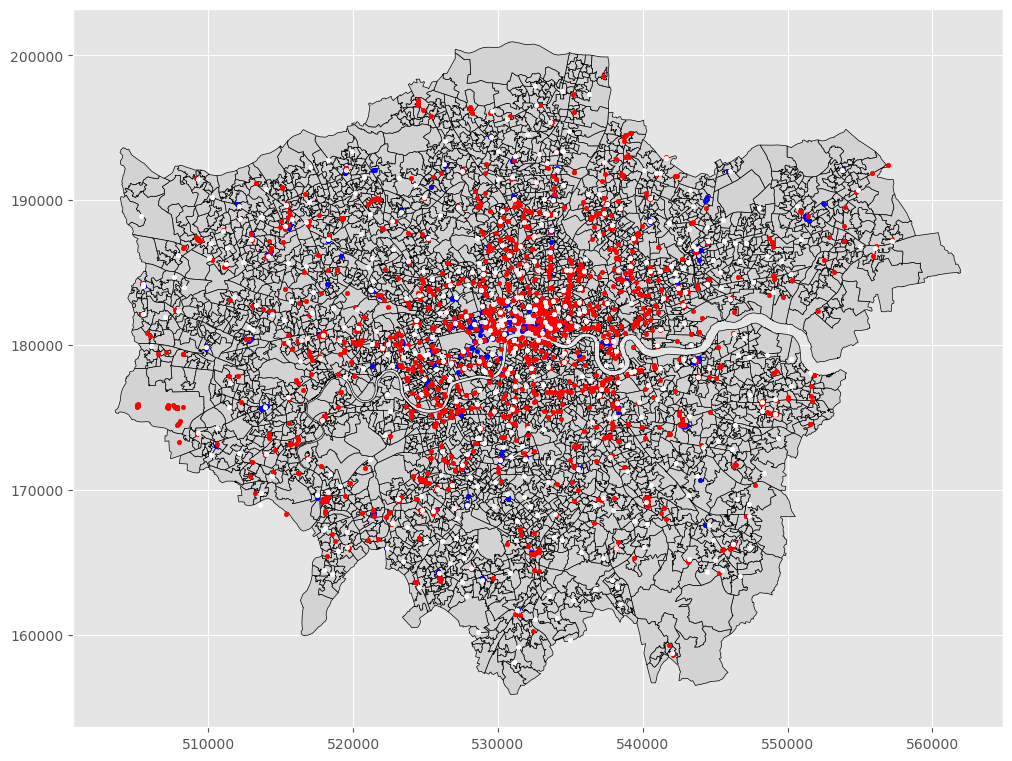

In [122]:
london_bank = london_pois_b[london_pois_b['fclass'].str.lower() == 'bank']
london_atm = london_pois_b[london_pois_b['fclass'].str.lower() == 'atm']
london_post_office = london_pois_b[london_pois_b['fclass'].str.lower() == 'post_office']

london_robbery = gpd.GeoDataFrame(london_robbery, geometry='geometry')

fig, ax = plt.subplots(figsize=(12, 12))
london_robbery.plot(ax=ax, color='lightgrey', edgecolor='black')
london_bank.plot(ax=ax, color='blue', markersize=10, label='Bank')
london_atm.plot(ax=ax, color='red', markersize=10, label='ATM')
london_post_office.plot(ax=ax, color='white', markersize=10, label='Post Office')

plt.show()

In [123]:
london_cash_point = gpd.GeoDataFrame(pd.concat([london_bank, london_atm,london_post_office], ignore_index=True))
print(london_cash_point)

           osm_id  code       fclass                      name  \
0        37552361  2601         bank                 Santander   
1        45265824  2601         bank                   NatWest   
2       254924507  2601         bank                   NatWest   
3       263905051  2601         bank                  Barclays   
4       264515393  2601         bank                       RBS   
...           ...   ...          ...                       ...   
2613  12286356677  2005  post_office     Southgate Post Office   
2614  12329283102  2005  post_office                      None   
2615  12390151554  2005  post_office        Mailbox & Shipping   
2616  12442546330  2005  post_office  Lewisham Way Post Office   
2617  12463256260  2005  post_office    Thamesmead Post Office   

                           geometry  
0     POINT (524293.149 163615.613)  
1      POINT (553799.77 192167.993)  
2     POINT (529625.928 181660.389)  
3     POINT (533699.169 187786.559)  
4     POINT (5304

/tmp/ipykernel_91550/3417751424.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  lsoa_with_cash = london_robbery[london_robbery.geometry.intersects(london_cash_point.unary_union)]


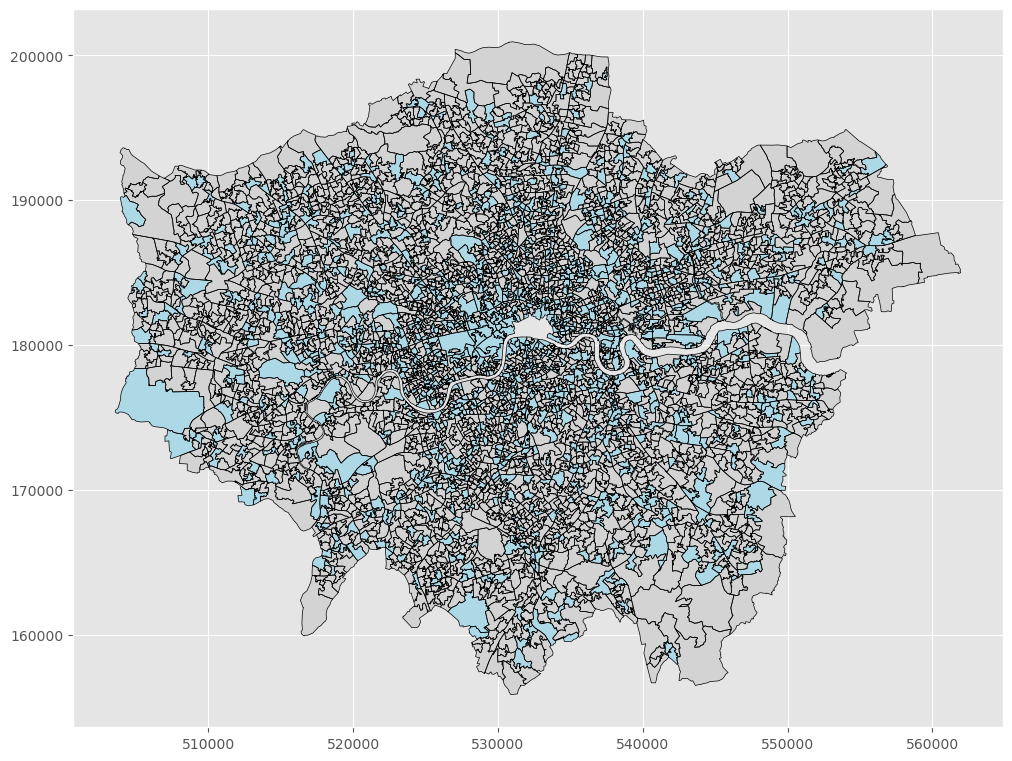

In [124]:
lsoa_with_cash = london_robbery[london_robbery.geometry.intersects(london_cash_point.unary_union)]

fig, ax = plt.subplots(figsize=(12, 12))

london_robbery.boundary.plot(ax=ax, color="black", linewidth=0.5)
london_robbery.plot(ax=ax, color="lightgrey")

lsoa_with_cash.plot(ax=ax, color="lightblue", label="LSOAs Having Cash Access Points")

plt.show()

In [125]:
data_with_cash = gpd.sjoin(london_robbery, london_cash_point, how='left', predicate='intersects')

london_robbery['cash_binary'] = 0  
london_robbery.loc[data_with_cash.index[data_with_cash['index_right'].notna()], 'cash_binary'] = 1
london_robbery['cash_binary'] = london_robbery['cash_binary'].astype(int)

cash_counts = london_robbery['cash_binary'].value_counts()

print("Number of LSOAs with cash access points (1):", cash_counts.get(1, 0))
print("Number of LSOAs without cash access points (0):", cash_counts.get(0, 0))

Number of LSOAs with cash access points (1): 1233
Number of LSOAs without cash access points (0): 3755


In [126]:
london_robbery

,LSOA21CD,LSOA21NM,total_robberies,geometry,cash_binary
0,E01003479,Newham 035A,20,"POLYGON ((542788.359 181260.24, 542857.557 181...",0
1,E01002717,Islington 016A,4,"POLYGON ((532592.419 184841.739, 532598.418 18...",0
2,E01004649,Westminster 001B,16,"POLYGON ((526774.163 183660.411, 526863.009 18...",0
3,E01003345,Lewisham 010E,3,"POLYGON ((536416.953 175841.015, 536368.688 17...",1
4,E01004001,Southwark 026B,1,"POLYGON ((535280 175962, 535263.112 175924.696...",0
...,...,...,...,...,...
4983,E01003533,Newham 011A,14,"POLYGON ((541757.151 184300.545, 541839.967 18...",0
4984,E01003755,Redbridge 023B,6,"POLYGON ((544415.042 188147.213, 544519.5 1881...",1
4985,E01002770,Islington 004B,57,"POLYGON ((529440.873 186924.224, 529426.268 18...",1
4986,E01003882,Richmond upon Thames 014A,6,"POLYGON ((515825.938 173340.281, 515888.927 17...",1


## **Controls**

**(1) Rate of Robberies per 1000**

In [127]:
age_path = "Data/Controls/ONS_LSOA_Age.csv"
london_age = pd.read_csv(age_path)

print(london_age.columns)

Index(['date', 'geography', 'geography code', 'Age: Total',
       'Age: Aged 4 years and under', 'Age: Aged 5 to 9 years',
       'Age: Aged 10 to 14 years', 'Age: Aged 15 to 19 years',
       'Age: Aged 20 to 24 years', 'Age: Aged 25 to 29 years',
       'Age: Aged 30 to 34 years', 'Age: Aged 35 to 39 years',
       'Age: Aged 40 to 44 years', 'Age: Aged 45 to 49 years',
       'Age: Aged 50 to 54 years', 'Age: Aged 55 to 59 years',
       'Age: Aged 60 to 64 years', 'Age: Aged 65 to 69 years',
       'Age: Aged 70 to 74 years', 'Age: Aged 75 to 79 years',
       'Age: Aged 80 to 84 years', 'Age: Aged 85 years and over'],
      dtype='object')


In [128]:
london_age['total_population'] = london_age['Age: Total']
london_age = london_age[['geography code', 'total_population']]

print(london_age)

      geography code  total_population
0          E01000001              1473
1          E01000002              1384
2          E01000003              1613
3          E01000005              1101
4          E01000006              1842
...              ...               ...
35667      W01002036              1553
35668      W01002037              1070
35669      W01002038              1265
35670      W01002039              1759
35671      W01002040              1944

[35672 rows x 2 columns]


In [129]:
london_robbery = pd.merge(
    london_robbery,
    london_age,
    left_on='LSOA21CD',
    right_on='geography code',
    how='left'
)

london_robbery = london_robbery.drop(columns=['geography code'])

print(london_robbery)

       LSOA21CD                   LSOA21NM  total_robberies  \
0     E01003479                Newham 035A               20   
1     E01002717             Islington 016A                4   
2     E01004649           Westminster 001B               16   
3     E01003345              Lewisham 010E                3   
4     E01004001             Southwark 026B                1   
...         ...                        ...              ...   
4983  E01003533                Newham 011A               14   
4984  E01003755             Redbridge 023B                6   
4985  E01002770             Islington 004B               57   
4986  E01003882  Richmond upon Thames 014A                6   
4987  E01002219                Harrow 030B               24   

                                               geometry  cash_binary  \
0     POLYGON ((542788.359 181260.24, 542857.557 181...            0   
1     POLYGON ((532592.419 184841.739, 532598.418 18...            0   
2     POLYGON ((526774.163 

In [130]:
london_robbery['robberies_per_1000'] = (london_robbery['total_robberies'] / london_robbery['total_population']) * 1000
print(london_robbery)

       LSOA21CD                   LSOA21NM  total_robberies  \
0     E01003479                Newham 035A               20   
1     E01002717             Islington 016A                4   
2     E01004649           Westminster 001B               16   
3     E01003345              Lewisham 010E                3   
4     E01004001             Southwark 026B                1   
...         ...                        ...              ...   
4983  E01003533                Newham 011A               14   
4984  E01003755             Redbridge 023B                6   
4985  E01002770             Islington 004B               57   
4986  E01003882  Richmond upon Thames 014A                6   
4987  E01002219                Harrow 030B               24   

                                               geometry  cash_binary  \
0     POLYGON ((542788.359 181260.24, 542857.557 181...            0   
1     POLYGON ((532592.419 184841.739, 532598.418 18...            0   
2     POLYGON ((526774.163 

**(2) Population Density**

In [131]:
london_robbery['lsoa_area_hectares'] = london_robbery.geometry.area / 10000 

In [132]:
london_robbery['population_density'] = london_robbery['total_population'] / london_robbery['lsoa_area_hectares']
london_robbery

,LSOA21CD,LSOA21NM,total_robberies,geometry,cash_binary,total_population,robberies_per_1000,lsoa_area_hectares,population_density
0,E01003479,Newham 035A,20,"POLYGON ((542788.359 181260.24, 542857.557 181...",0,1547,12.9282,29.9757,51.6085
1,E01002717,Islington 016A,4,"POLYGON ((532592.419 184841.739, 532598.418 18...",0,1206,3.3167,12.2379,98.5467
2,E01004649,Westminster 001B,16,"POLYGON ((526774.163 183660.411, 526863.009 18...",0,1411,11.3395,19.5410,72.2072
3,E01003345,Lewisham 010E,3,"POLYGON ((536416.953 175841.015, 536368.688 17...",1,1959,1.5314,15.5657,125.8537
4,E01004001,Southwark 026B,1,"POLYGON ((535280 175962, 535263.112 175924.696...",0,1767,0.5659,19.4182,90.9970
...,...,...,...,...,...,...,...,...,...
4983,E01003533,Newham 011A,14,"POLYGON ((541757.151 184300.545, 541839.967 18...",0,2315,6.0475,11.3337,204.2578
4984,E01003755,Redbridge 023B,6,"POLYGON ((544415.042 188147.213, 544519.5 1881...",1,2413,2.4865,21.8406,110.4823
4985,E01002770,Islington 004B,57,"POLYGON ((529440.873 186924.224, 529426.268 18...",1,1841,30.9614,21.0592,87.4201
4986,E01003882,Richmond upon Thames 014A,6,"POLYGON ((515825.938 173340.281, 515888.927 17...",1,2001,2.9985,21.3405,93.7653


**(3) Proportion of High-skilled Workers & Unemployed**

In [133]:
occupation_path = "Data/Controls/ONS_LSOA_Occupation.csv"
london_occupation = pd.read_csv(occupation_path)

print(london_occupation.columns)

Index(['Lower layer Super Output Areas Code', 'Lower layer Super Output Areas',
       'National Statistics Socio-economic Classification (NS-SeC) (10 categories) Code',
       'National Statistics Socio-economic Classification (NS-SeC) (10 categories)',
       'Observation'],
      dtype='object')


In [134]:
#Filter for categories 1 and 2, and calculate the sum for each LSOA (Output a)
occupation_filtered_professional = london_occupation[
    london_occupation['National Statistics Socio-economic Classification (NS-SeC) (10 categories) Code'].isin([1, 2])
]
occupation_output_a = occupation_filtered_professional.groupby('Lower layer Super Output Areas Code').agg(
    Sum_Observation_Professional=('Observation', 'sum')
).reset_index()

#Filter for category 8, and get the Observation values for each LSOA (Output b)
occupation_filtered_unemployed = london_occupation[
    london_occupation['National Statistics Socio-economic Classification (NS-SeC) (10 categories) Code'] == 8
]
occupation_output_b = occupation_filtered_unemployed.groupby('Lower layer Super Output Areas Code').agg(
    Sum_Observation_Unemployed=('Observation', 'sum')
).reset_index()

#Add another column as the sum of all categories for each LSOA code (Output c)
occupation_output_c = london_occupation.groupby('Lower layer Super Output Areas Code').agg(
    Total_Sum=('Observation', 'sum')
).reset_index()

#Merge Output a, b, and c to calculate the proportions
occupation_combined = occupation_output_a.merge(
    occupation_output_b,
    on='Lower layer Super Output Areas Code',
    how='left'
).merge(
    occupation_output_c,
    on='Lower layer Super Output Areas Code',
    how='left'
)

#Calculate proportion_professional (Output d) and proportion_unemployed (Output e)
occupation_combined['proportion_professional'] = (
    occupation_combined['Sum_Observation_Professional'] / occupation_combined['Total_Sum']
)
occupation_combined['proportion_unemployed'] = (
    occupation_combined['Sum_Observation_Unemployed'] / occupation_combined['Total_Sum']
)

#Keep only Output d, e, and the ward code in the final dataframe
final_occupation = occupation_combined[[
    'Lower layer Super Output Areas Code', 'proportion_professional', 'proportion_unemployed'
]]

print(final_occupation)

     Lower layer Super Output Areas Code  \
0                              E01000001   
1                              E01000002   
2                              E01000003   
3                              E01000005   
4                              E01000006   
...                                  ...   
4989                           E01035718   
4990                           E01035719   
4991                           E01035720   
4992                           E01035721   
4993                           E01035722   

                      proportion_professional  \
0                                      0.6673   
1                                      0.7141   
2                                      0.5774   
3                                      0.2579   
4                                      0.1789   
...                                       ...   
4989                                   0.3048   
4990                                   0.4870   
4991                          

In [135]:
london_robbery = london_robbery.merge(
    final_occupation,
    how='left',
    left_on='LSOA21CD',
    right_on='Lower layer Super Output Areas Code'
)

london_robbery.drop(columns=['Lower layer Super Output Areas Code'], inplace=True)

london_robbery

,LSOA21CD,LSOA21NM,total_robberies,geometry,cash_binary,total_population,robberies_per_1000,lsoa_area_hectares,population_density,proportion_professional,proportion_unemployed
0,E01003479,Newham 035A,20,"POLYGON ((542788.359 181260.24, 542857.557 181...",0,1547,12.9282,29.9757,51.6085,0.1625,0.0939
1,E01002717,Islington 016A,4,"POLYGON ((532592.419 184841.739, 532598.418 18...",0,1206,3.3167,12.2379,98.5467,0.4416,0.0713
2,E01004649,Westminster 001B,16,"POLYGON ((526774.163 183660.411, 526863.009 18...",0,1411,11.3395,19.5410,72.2072,0.4450,0.0823
3,E01003345,Lewisham 010E,3,"POLYGON ((536416.953 175841.015, 536368.688 17...",1,1959,1.5314,15.5657,125.8537,0.3699,0.0622
4,E01004001,Southwark 026B,1,"POLYGON ((535280 175962, 535263.112 175924.696...",0,1767,0.5659,19.4182,90.9970,0.2363,0.1492
...,...,...,...,...,...,...,...,...,...,...,...
4983,E01003533,Newham 011A,14,"POLYGON ((541757.151 184300.545, 541839.967 18...",0,2315,6.0475,11.3337,204.2578,0.1382,0.1706
4984,E01003755,Redbridge 023B,6,"POLYGON ((544415.042 188147.213, 544519.5 1881...",1,2413,2.4865,21.8406,110.4823,0.2122,0.0850
4985,E01002770,Islington 004B,57,"POLYGON ((529440.873 186924.224, 529426.268 18...",1,1841,30.9614,21.0592,87.4201,0.4555,0.0933
4986,E01003882,Richmond upon Thames 014A,6,"POLYGON ((515825.938 173340.281, 515888.927 17...",1,2001,2.9985,21.3405,93.7653,0.4842,0.0240


**(4) Proportion of Residents Living for Less Than 2 Years**

In [136]:
stability_path = "Data/Controls/ONS_LSOA_Stability.csv"
london_stability = pd.read_csv(stability_path)

print(london_stability.columns)

Index(['Lower layer Super Output Areas Code', 'Lower layer Super Output Areas',
       'Length of residence in the UK (6 categories) Code',
       'Length of residence in the UK (6 categories)', 'Observation'],
      dtype='object')


In [137]:
stability_filtered_l2y = london_stability[
    london_stability['Length of residence in the UK (6 categories) Code'] == 5
]

stability_output = stability_filtered_l2y.groupby('Lower layer Super Output Areas Code').agg(
    stability_output=('Observation', 'sum')
).reset_index()

stability_sum = london_stability.groupby('Lower layer Super Output Areas Code').agg(
    Total_Sum=('Observation', 'sum')
).reset_index()

stability_output['proportion_lt2'] = (
    stability_output['stability_output'] / stability_sum['Total_Sum']
)

london_robbery = london_robbery.merge(
    stability_output,
    how='left',
    left_on='LSOA21CD',
    right_on='Lower layer Super Output Areas Code'
)

london_robbery.drop(columns=['Lower layer Super Output Areas Code','stability_output'], inplace=True)

london_robbery

,LSOA21CD,LSOA21NM,total_robberies,geometry,cash_binary,total_population,robberies_per_1000,lsoa_area_hectares,population_density,proportion_professional,proportion_unemployed,proportion_lt2
0,E01003479,Newham 035A,20,"POLYGON ((542788.359 181260.24, 542857.557 181...",0,1547,12.9282,29.9757,51.6085,0.1625,0.0939,0.0401
1,E01002717,Islington 016A,4,"POLYGON ((532592.419 184841.739, 532598.418 18...",0,1206,3.3167,12.2379,98.5467,0.4416,0.0713,0.0464
2,E01004649,Westminster 001B,16,"POLYGON ((526774.163 183660.411, 526863.009 18...",0,1411,11.3395,19.5410,72.2072,0.4450,0.0823,0.1272
3,E01003345,Lewisham 010E,3,"POLYGON ((536416.953 175841.015, 536368.688 17...",1,1959,1.5314,15.5657,125.8537,0.3699,0.0622,0.0173
4,E01004001,Southwark 026B,1,"POLYGON ((535280 175962, 535263.112 175924.696...",0,1767,0.5659,19.4182,90.9970,0.2363,0.1492,0.0153
...,...,...,...,...,...,...,...,...,...,...,...,...
4983,E01003533,Newham 011A,14,"POLYGON ((541757.151 184300.545, 541839.967 18...",0,2315,6.0475,11.3337,204.2578,0.1382,0.1706,0.0410
4984,E01003755,Redbridge 023B,6,"POLYGON ((544415.042 188147.213, 544519.5 1881...",1,2413,2.4865,21.8406,110.4823,0.2122,0.0850,0.0377
4985,E01002770,Islington 004B,57,"POLYGON ((529440.873 186924.224, 529426.268 18...",1,1841,30.9614,21.0592,87.4201,0.4555,0.0933,0.0716
4986,E01003882,Richmond upon Thames 014A,6,"POLYGON ((515825.938 173340.281, 515888.927 17...",1,2001,2.9985,21.3405,93.7653,0.4842,0.0240,0.0315


**(5) Distance to the Nearest Tube/Train Stations**

In [138]:
osm_transport_path = "Data/OSM/gis_osm_transport_free_1.shp"

london_osm_transport = gpd.read_file(osm_transport_path)

london_osm_transport = london_osm_transport.to_crs(epsg=27700)

unique_fclass_transport = london_osm_transport['fclass'].unique()

print(london_osm_transport)
print("Unique values in the 'fclass' column:")
print(unique_fclass_transport)

            osm_id  code           fclass                         name  \
0           780856  5601  railway_station       Shepherd's Bush Market   
1          1256794  5601  railway_station                 West Drayton   
2          2013971  5601  railway_station             Finchley Central   
3          9780241  5601  railway_station                 St Mary Cray   
4         13884199  5601  railway_station           Mill Hill Broadway   
...            ...   ...              ...                          ...   
20951  12372424415  5621         bus_stop    Cromwell Road Bus Station   
20952  12372424416  5621         bus_stop    Cromwell Road Bus Station   
20953  12372424417  5621         bus_stop    Cromwell Road Bus Station   
20954  12379246728  5622      bus_station  Heathrow Airport Terminal 5   
20955  12390151555  5641             taxi            Eagles Chauffeurs   

                            geometry  
0      POINT (523194.301 180061.741)  
1        POINT (506147.43 180085.

In [139]:
railway_stations = london_osm_transport[london_osm_transport['fclass'].str.lower() == 'railway_station']

print(railway_stations)

            osm_id  code           fclass                      name  \
0           780856  5601  railway_station    Shepherd's Bush Market   
1          1256794  5601  railway_station              West Drayton   
2          2013971  5601  railway_station          Finchley Central   
3          9780241  5601  railway_station              St Mary Cray   
4         13884199  5601  railway_station        Mill Hill Broadway   
...            ...   ...              ...                       ...   
20807   9754554222  5601  railway_station      Tottenham Court Road   
20808   9755755752  5601  railway_station                Abbey Wood   
20934  12251132731  5601  railway_station              Hanwell Halt   
20935  12254780537  5601  railway_station  St Pancras International   
20938  12286269903  5601  railway_station          Liverpool Street   

                            geometry  
0      POINT (523194.301 180061.741)  
1        POINT (506147.43 180085.17)  
2       POINT (525292.941 1906

In [140]:
london_robbery['centroid'] = london_robbery.geometry.centroid

# Compute the distance from each LSOA centroid to the nearest railway station and convert to kilometers
london_robbery['distance_rail'] = london_robbery['centroid'].apply(
    lambda lsoa_centroid: railway_stations.geometry.distance(lsoa_centroid).min() / 1000  # Convert meters to kilometers
)

london_robbery.drop(columns=['centroid'], inplace=True)

london_robbery

,LSOA21CD,LSOA21NM,total_robberies,geometry,cash_binary,total_population,robberies_per_1000,lsoa_area_hectares,population_density,proportion_professional,proportion_unemployed,proportion_lt2,distance_rail
0,E01003479,Newham 035A,20,"POLYGON ((542788.359 181260.24, 542857.557 181...",0,1547,12.9282,29.9757,51.6085,0.1625,0.0939,0.0401,0.4011
1,E01002717,Islington 016A,4,"POLYGON ((532592.419 184841.739, 532598.418 18...",0,1206,3.3167,12.2379,98.5467,0.4416,0.0713,0.0464,0.3098
2,E01004649,Westminster 001B,16,"POLYGON ((526774.163 183660.411, 526863.009 18...",0,1411,11.3395,19.5410,72.2072,0.4450,0.0823,0.1272,0.1275
3,E01003345,Lewisham 010E,3,"POLYGON ((536416.953 175841.015, 536368.688 17...",1,1959,1.5314,15.5657,125.8537,0.3699,0.0622,0.0173,0.2018
4,E01004001,Southwark 026B,1,"POLYGON ((535280 175962, 535263.112 175924.696...",0,1767,0.5659,19.4182,90.9970,0.2363,0.1492,0.0153,0.3867
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,E01003533,Newham 011A,14,"POLYGON ((541757.151 184300.545, 541839.967 18...",0,2315,6.0475,11.3337,204.2578,0.1382,0.1706,0.0410,0.6652
4984,E01003755,Redbridge 023B,6,"POLYGON ((544415.042 188147.213, 544519.5 1881...",1,2413,2.4865,21.8406,110.4823,0.2122,0.0850,0.0377,0.6810
4985,E01002770,Islington 004B,57,"POLYGON ((529440.873 186924.224, 529426.268 18...",1,1841,30.9614,21.0592,87.4201,0.4555,0.0933,0.0716,0.2632
4986,E01003882,Richmond upon Thames 014A,6,"POLYGON ((515825.938 173340.281, 515888.927 17...",1,2001,2.9985,21.3405,93.7653,0.4842,0.0240,0.0315,0.7332


**(6) Density of Bus Stop**

In [141]:
bus_stops = london_osm_transport[london_osm_transport['fclass'].str.lower() == 'bus_stop']
bus_stops

,osm_id,code,fclass,name,geometry
27,21687803,5621,bus_stop,Fleet Street / City Thameslink,POINT (531608.755 181296.697)
35,25477351,5621,bus_stop,Liverpool Street Station,POINT (533272.182 181580.605)
58,49794429,5621,bus_stop,Greenwood Road,POINT (534366.244 184479.57)
62,71027415,5621,bus_stop,Lynton Road,POINT (519276.403 180930.218)
63,81501657,5621,bus_stop,Norbiton Church,POINT (518810.212 169355.726)
...,...,...,...,...,...
20949,12372424413,5621,bus_stop,Cromwell Road Bus Station,POINT (518389.735 169527.81)
20950,12372424414,5621,bus_stop,Cromwell Road Bus Station,POINT (518384.239 169527.805)
20951,12372424415,5621,bus_stop,Cromwell Road Bus Station,POINT (518377.671 169527.797)
20952,12372424416,5621,bus_stop,Cromwell Road Bus Station,POINT (518372.669 169527.792)


In [142]:
london_robbery['bus_stop_count'] = 0

for idx, lsoa in london_robbery.iterrows():
    count = bus_stops[bus_stops.geometry.intersects(lsoa.geometry)].shape[0]
    london_robbery.at[idx, 'bus_stop_count'] = count

london_robbery['bus_stop_density'] = london_robbery['bus_stop_count'] / london_robbery['lsoa_area_hectares']
london_robbery.drop(columns=['bus_stop_count'], inplace=True)

london_robbery

,LSOA21CD,LSOA21NM,total_robberies,geometry,cash_binary,total_population,robberies_per_1000,lsoa_area_hectares,population_density,proportion_professional,proportion_unemployed,proportion_lt2,distance_rail,bus_stop_density
0,E01003479,Newham 035A,20,"POLYGON ((542788.359 181260.24, 542857.557 181...",0,1547,12.9282,29.9757,51.6085,0.1625,0.0939,0.0401,0.4011,0.0667
1,E01002717,Islington 016A,4,"POLYGON ((532592.419 184841.739, 532598.418 18...",0,1206,3.3167,12.2379,98.5467,0.4416,0.0713,0.0464,0.3098,0.0817
2,E01004649,Westminster 001B,16,"POLYGON ((526774.163 183660.411, 526863.009 18...",0,1411,11.3395,19.5410,72.2072,0.4450,0.0823,0.1272,0.1275,0.2047
3,E01003345,Lewisham 010E,3,"POLYGON ((536416.953 175841.015, 536368.688 17...",1,1959,1.5314,15.5657,125.8537,0.3699,0.0622,0.0173,0.2018,0.0642
4,E01004001,Southwark 026B,1,"POLYGON ((535280 175962, 535263.112 175924.696...",0,1767,0.5659,19.4182,90.9970,0.2363,0.1492,0.0153,0.3867,0.1545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,E01003533,Newham 011A,14,"POLYGON ((541757.151 184300.545, 541839.967 18...",0,2315,6.0475,11.3337,204.2578,0.1382,0.1706,0.0410,0.6652,0.2647
4984,E01003755,Redbridge 023B,6,"POLYGON ((544415.042 188147.213, 544519.5 1881...",1,2413,2.4865,21.8406,110.4823,0.2122,0.0850,0.0377,0.6810,0.2747
4985,E01002770,Islington 004B,57,"POLYGON ((529440.873 186924.224, 529426.268 18...",1,1841,30.9614,21.0592,87.4201,0.4555,0.0933,0.0716,0.2632,0.6648
4986,E01003882,Richmond upon Thames 014A,6,"POLYGON ((515825.938 173340.281, 515888.927 17...",1,2001,2.9985,21.3405,93.7653,0.4842,0.0240,0.0315,0.7332,0.1874


**(7) Road Density**

In [143]:
osm_road_path = "Data/OSM/gis_osm_roads_free_1.shp"

london_osm_road = gpd.read_file(osm_road_path)

london_osm_road = london_osm_road.to_crs(epsg=27700)

unique_fclass_road = london_osm_road['fclass'].unique()

print(london_osm_road)
print("Unique values in the 'fclass' column:")
print(unique_fclass_road)

            osm_id  code       fclass              name    ref oneway  \
0               74  5113      primary     Ballards Lane   A598      B   
1               75  5113      primary         High Road  A1000      B   
2               79  5113      primary     East End Road   A504      B   
3              482  5113      primary  Cockfosters Road   A111      B   
4              488  5122  residential       Western Way   None      B   
...            ...   ...          ...               ...    ...    ...   
499215  1348549342  5155        steps              None   None      B   
499216  1348549343  5153      footway              None   None      B   
499217  1348549344  5155        steps              None   None      B   
499218  1348549345  5155        steps              None   None      B   
499219  1348549346  5153      footway              None   None      B   

        maxspeed  layer bridge tunnel  \
0             48      0      F      F   
1             48      0      F      F   


In [144]:
#Clip roads to each LSOA polygon
roads_within_lsoas = gpd.overlay(london_osm_road, london_robbery, how='intersection')

#Calculate the length of each road segment in kilometers
roads_within_lsoas['road_length_km'] = roads_within_lsoas.geometry.length / 1000

#Aggregate road lengths by LSOA
road_lengths_per_lsoa = roads_within_lsoas.groupby('LSOA21CD').agg({'road_length_km': 'sum'}).reset_index()

#Merge the aggregated road lengths with the LSOA GeoDataFrame
london_robbery = london_robbery.merge(road_lengths_per_lsoa, how='left', on='LSOA21CD')

#Calculate road density (road length in km per hectare)
london_robbery['road_density'] = london_robbery['road_length_km'] / london_robbery['lsoa_area_hectares']

#Replace NaN values in road_density with 0 (for LSOAs with no roads)
london_robbery['road_density'] = london_robbery['road_density'].fillna(0).astype(float)

london_robbery.drop(columns=['road_length_km'], inplace=True)

print(london_robbery)

       LSOA21CD                   LSOA21NM  total_robberies  \
0     E01003479                Newham 035A               20   
1     E01002717             Islington 016A                4   
2     E01004649           Westminster 001B               16   
3     E01003345              Lewisham 010E                3   
4     E01004001             Southwark 026B                1   
...         ...                        ...              ...   
4983  E01003533                Newham 011A               14   
4984  E01003755             Redbridge 023B                6   
4985  E01002770             Islington 004B               57   
4986  E01003882  Richmond upon Thames 014A                6   
4987  E01002219                Harrow 030B               24   

                                               geometry  cash_binary  \
0     POLYGON ((542788.359 181260.24, 542857.557 181...            0   
1     POLYGON ((532592.419 184841.739, 532598.418 18...            0   
2     POLYGON ((526774.163 

## **Final Dataframe**

In [145]:
column_order_df = [
    "LSOA21CD", "LSOA21NM", "robberies_per_1000", "population_density",
    "proportion_professional", "proportion_unemployed", "proportion_lt2",
    "cash_binary", "bus_stop_density", "distance_rail", "road_density", "geometry"
]

df_clean = london_robbery[column_order_df]
print(df_clean)

       LSOA21CD                   LSOA21NM  \
0     E01003479                Newham 035A   
1     E01002717             Islington 016A   
2     E01004649           Westminster 001B   
3     E01003345              Lewisham 010E   
4     E01004001             Southwark 026B   
...         ...                        ...   
4983  E01003533                Newham 011A   
4984  E01003755             Redbridge 023B   
4985  E01002770             Islington 004B   
4986  E01003882  Richmond upon Thames 014A   
4987  E01002219                Harrow 030B   

                           robberies_per_1000  \
0                                     12.9282   
1                                      3.3167   
2                                     11.3395   
3                                      1.5314   
4                                      0.5659   
...                                       ...   
4983                                   6.0475   
4984                                   2.4865   
4985  

# **Machine Learning**

## **Environment**

In [146]:
selected_columns_df1 = [
    "robberies_per_1000", "population_density", "proportion_professional",
    "proportion_unemployed", "proportion_lt2", "cash_binary",
    "bus_stop_density", "distance_rail", "road_density"
]

df_1 = df_clean[selected_columns_df1]

print(df_1)

                           robberies_per_1000  \
0                                     12.9282   
1                                      3.3167   
2                                     11.3395   
3                                      1.5314   
4                                      0.5659   
...                                       ...   
4983                                   6.0475   
4984                                   2.4865   
4985                                  30.9614   
4986                                   2.9985   
4987                                  12.4352   

                           population_density  \
0                                     51.6085   
1                                     98.5467   
2                                     72.2072   
3                                    125.8537   
4                                     90.9970   
...                                       ...   
4983                                 204.2578   
4984               

In [147]:
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.metrics import root_mean_squared_error

# Model 1: Random forest
from sklearn.ensemble import RandomForestRegressor

# Model 2: xgboost (GBDT)
import xgboost
from xgboost import XGBRegressor

# Feature Importance (Permutation Feature Importance)
import rfpimp

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [148]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4988 entries, 0 to 4987
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   robberies_per_1000       4988 non-null   float64
 1   population_density       4988 non-null   float64
 2   proportion_professional  4988 non-null   float64
 3   proportion_unemployed    4988 non-null   float64
 4   proportion_lt2           4988 non-null   float64
 5   cash_binary              4988 non-null   int64  
 6   bus_stop_density         4988 non-null   float64
 7   distance_rail            4988 non-null   float64
 8   road_density             4988 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 350.8 KB


In [149]:
df_1.head()

,robberies_per_1000,population_density,proportion_professional,proportion_unemployed,proportion_lt2,cash_binary,bus_stop_density,distance_rail,road_density
0,12.9282,51.6085,0.1625,0.0939,0.0401,0,0.0667,0.4011,0.2837
1,3.3167,98.5467,0.4416,0.0713,0.0464,0,0.0817,0.3098,0.3254
2,11.3395,72.2072,0.4450,0.0823,0.1272,0,0.2047,0.1275,0.2750
3,1.5314,125.8537,0.3699,0.0622,0.0173,1,0.0642,0.2018,0.2387
4,0.5659,90.9970,0.2363,0.1492,0.0153,0,0.1545,0.3867,0.2305


## **Train & Test Split**

In [150]:
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(
    df_1.drop(['robberies_per_1000'], axis = 1), # X variable
    df_1.robberies_per_1000, # Y variable
    random_state=random_state_split)

In [151]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

# Check the index of train_x and train_y, which should be identical. 
# The index indicates which rows from the original data.

print(train_x.index.identical(train_y.index))
print(test_x.index.identical(test_y.index))

(3741, 8)
(3741,)
(1247, 8)
(1247,)
True
True


## **Random Forest**

**(1) Range of Tested Hyperparameters**

In [152]:
from sklearn.tree import DecisionTreeRegressor

# CART using default settings
cart_default = DecisionTreeRegressor(random_state=0)
cart_default.fit(train_x, train_y)

# Print the deafult tree depth
print("Tree depth: {}".format(cart_default.get_depth()))

Tree depth: 33


**Hyperparameter Tuning**

RF has two groups of hyperparameters:

1. **The *hyperparameters* of decision trees, such as **max_depth**, **min_samples_split****

- For **min_samples_split**, as it is a positive integer value and the default value is 2, we can set the range as **[2,4,6,8,10]**.

- For **max_depth**, we can build a decision tree using default settings and check the tree depth, then choose the range around this tree depth. The code below shows that the tree depth of a CART with default settings is 33, so we can set the range as **[10,20,30,40,50]**.
                                                               
2. **The *configurations* of RF, such as the number of trees (called **n_estimators**).** 

- By default, **n_estimators** is set as **100**. Some intuition is that the larger n_estimators, the more stable the model performance and the longer computing time. This is because the computing time is a linear function of the number of trees. The default value of 100 trees is good for most applications, so we don't tune this hyperparameter here.

**(2) Cross-Validation**

In [153]:
# Values of max_depth and min_samples_split
hyperparameters = {'max_depth':[10,20,30,40,50], 'min_samples_split':[2,4,6,8,10]}

randomState_dt = 10000
rf = RandomForestRegressor(random_state=randomState_dt)

# CV=5 by default, which means 5-fold cross-validation
clf = GridSearchCV(rf, hyperparameters)

clf.fit(train_x, train_y)

# Query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 20, 'min_samples_split': 6}
The best score is: 
0.30357257697797085


**(3) Model Training & Fitting**

In [154]:
rf_final = RandomForestRegressor(max_depth=clf.best_params_['max_depth'], min_samples_split=clf.best_params_['min_samples_split'], random_state=randomState_dt)
rf_final.fit(train_x, train_y)

RandomForestRegressor(max_depth=20, min_samples_split=6, random_state=10000)

In [155]:
print("R² on the training data:")
print(rf_final.score(X=train_x, y=train_y))
print("R² on the testing data:")
print(rf_final.score(X=test_x, y=test_y))

R² on the training data:
0.7503875969650721
R² on the testing data:
0.37092161445706673


In [156]:
print("RMSE on the training data:")
print(root_mean_squared_error(train_y, rf_final.predict(train_x)))
print("RMSE on the testing data:")
print(root_mean_squared_error(test_y, rf_final.predict(test_x)))

RMSE on the training data:
9.436288490628833
RMSE on the testing data:
11.482446780649395


**(4) Model Interpretation**

                                                      Importance
Feature                                                         
road_density                                              0.4059
proportion_lt2                                            0.2331
population_density                                        0.1728
bus_stop_density                                          0.0917
cash_binary                                               0.0459
distance_rail                                             0.0294
proportion_professional                                   0.0166
proportion_unemployed                                     0.0158


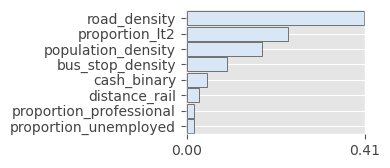

In [157]:
imp = rfpimp.importances(rf_final, test_x, test_y)
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

## __GBDT (XGBoost)__

XGBoost has two groups of hyperparameters:

1. **The hyperparameters of decision trees**: `max_depth`, `min_samples_split`
2. **The configurations of XGBoost**: `n_estimators`, `regularisation hyperparameters`.

Here are a list of potentially important hyperparameters for XGBoost, recommended by [this post](https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663):

1. `max_depth`: The maximum depth per tree. A deeper tree might increase the performance, but also the complexity and chances to overfit. The value must be an integer greater than 0. Default is 6.

1. `learning_rate`: The learning rate determines the step size at each iteration while your model optimizes toward its objective. A low learning rate makes computation slower, and requires more rounds to achieve the same reduction in residual error as a model with a high learning rate. But it optimizes the chances to reach the best optimum. The value must be between 0 and 1. Default is 0.3.

1. `n_estimators`: The number of trees in the ensemble. Equivalent to the number of boosting rounds. The value must be an integer greater than 0. Default is 100.

1. `colsample_bytree`: Represents the fraction of columns to be randomly sampled for each tree. It might improve overfitting.
The value must be between 0 and 1. Default is 1.

1. `subsample`: Represents the fraction of observations to be sampled for each tree. A lower values prevent overfitting but might lead to under-fitting.
The value must be between 0 and 1. Default is 1.

1. `alpha (reg_alpha)`: L1 regularization on the weights (Lasso Regression). When working with a large number of features, it might improve speed performances. It can be any integer. Default is 0.

1. `lambda (reg_lambda)`: L2 regularization on the weights (Ridge Regression). It might help to reduce overfitting. It can be any integer. Default is 1.

1. `gamma`: Gamma is a pseudo-regularisation parameter (Lagrangian multiplier), and depends on the other parameters. The higher Gamma is, the higher the regularization. It can be any integer. Default is 0.

The last three hyperparameters - alpha, lambda, and gamma - are related to the regularization of the model. In machine learning, regularization is a number of techniques to reduce the model complexity and the chances of overfitting.

If you want to know more about these hyperparameters, you can read [the XGBoost documentation](https://xgboost.readthedocs.io/en/latest/parameter.html).

Here, we will focus on the tuning of max_depth and n_estimators.

**(1) Cross-Validation**

In [158]:
# Values of max_depth and min_samples_split
hyperparameters = {'max_depth':[10,20,30,40,50], 'n_estimators':[50,100,150,200,250]}

randomState_xgb = 125
xgb = XGBRegressor(random_state=randomState_xgb)

# CV=5 by default, which means 5-fold cross-validation
gscv_xgb = GridSearchCV(xgb, hyperparameters)

gscv_xgb.fit(train_x, train_y)

# Query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (gscv_xgb.best_params_)
print ("The best score is: ")
print (gscv_xgb.best_score_)

The best parameter value is: 
{'max_depth': 10, 'n_estimators': 50}
The best score is: 
0.2552123676255279


**(2) Model Training & Fitting**

In [159]:
xgb_final = XGBRegressor(max_depth=gscv_xgb.best_params_['max_depth'], n_estimators=gscv_xgb.best_params_['n_estimators'], random_state=randomState_xgb)
xgb_final.fit(train_x, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=125, ...)

In [160]:
print("R² on the training data:")
print(xgb_final.score(X=train_x, y=train_y))
print("R² on the testing data:")
print(xgb_final.score(X=test_x, y=test_y))

R² on the training data:
0.9991134881668483
R² on the testing data:
0.43428198778667604


In [161]:
print("RMSE on the training data:")
print(root_mean_squared_error(train_y, xgb_final.predict(train_x)))
print("RMSE on the testing data:")
print(root_mean_squared_error(test_y, xgb_final.predict(test_x)))

RMSE on the training data:
0.5623547886923753
RMSE on the testing data:
10.888851193124943


**(3) Model Interpretation**

                                                      Importance
Feature                                                         
population_density                                        1.5749
road_density                                              1.5601
proportion_lt2                                            0.3244
bus_stop_density                                          0.2549
distance_rail                                             0.0809
proportion_professional                                   0.0800
cash_binary                                               0.0565
proportion_unemployed                                     0.0493


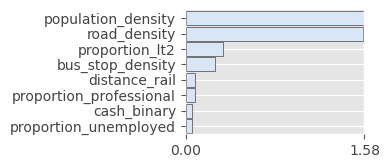

In [162]:
imp = rfpimp.importances(xgb_final, test_x, test_y) 
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()